## Library Import

In [ ]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import lag_plot
from IPython.display import display,Markdown
import plotly
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.simplefilter('ignore')

import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_forecast_component
from prophet_plots_plotly import plot_model_components, plot_model

buttons_to_remove = ['zoom2d','zoomIn2d','zoomOut2d','toImage',
                     'sendDataToCloud',
                     'editInChartStudio',
                     'select2d',
                     'lasso2d',]

scatter_config = {'displayModeBar': 'Always',
                 "displaylogo": False,
                 'modeBarButtons': 'toggleHover ',
                 'modeBarButtonsToRemove': buttons_to_remove,}


In [ ]:
df_cpi = pd.read_excel('CPIRawData.xlsx',engine='openpyxl',sheet_name = 'BLS Data Series',skiprows=11)

window = 3

df_cpi['RollingAvgCPI'] = df_cpi.Annual.rolling(window).mean()
df_cpi['RollingAvgCPI_low'] = df_cpi.Annual.rolling(window).min()
df_cpi['RollingAvgCPI_high'] = df_cpi.Annual.rolling(window).max()

df_cpi['Inflation'] = (df_cpi.Annual.diff()/ df_cpi['Annual'].shift(1))*100
df_cpi['RollingAvgInflation'] = df_cpi.Inflation.rolling(window).mean()
df_cpi['RollingAvgInflation_low'] = df_cpi.Inflation.rolling(window).min()
df_cpi['RollingAvgInflation_high'] = df_cpi.Inflation.rolling(window).max()


df_cpi.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2,RollingAvgCPI,RollingAvgCPI_low,RollingAvgCPI_high,Inflation,RollingAvgInflation,RollingAvgInflation_low,RollingAvgInflation_high
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,NaN,NaN,NaN,NaN,NaN,1.010101,NaN,NaN,NaN
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,NaN,NaN,10.000000,9.9,10.1,1.000000,NaN,NaN,NaN
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,NaN,NaN,10.333333,10.0,10.9,7.920792,3.310298,1.0,7.920792
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,NaN,NaN,11.266667,10.1,12.8,17.431193,8.783995,1.0,17.431193


In [ ]:
'''
CPI
'''

fig = go.Figure()

y = df_cpi['Annual']
x = df_cpi['Year']
y_roll = df_cpi['RollingAvgCPI']
y_rollmin = df_cpi['RollingAvgCPI_low']
y_rollmax = df_cpi['RollingAvgCPI_high']

fig.add_trace(go.Scatter(x=x, y=y,
                         marker=dict(color='#005100',size = 5),
                         line = dict(color='#005100',width = 1),
                         mode='markers+lines',
                         name='Yearly CPI'))

fig.add_trace(go.Scatter(x=x, y=y_roll,
                         line = dict(color='#FF3333',width = 1),
                         mode='lines',
                         name=f'{window} Year Rolling Avg'))

fig.add_trace(go.Scatter(x=x, y=y_rollmin,
                         line = dict(color='#bf9fa2',width = 1),
                         mode='lines',
                         name=f'{window} Year Rolling Low'))

fig.add_trace(go.Scatter(x=x, y=y_rollmax,
                         line = dict(color='#bf9fa2',width = 1),
                         mode='lines',
                         fill='tonexty',
                         name=f'{window} Year Rolling High'))

fig.update_xaxes(tickangle=-45, tickfont = dict(family = 'Arial', size = 14,color = 'black'))
fig.update_layout(hovermode="x unified",clickmode ='select',height=500,width=1100,)

fig.show(config=scatter_config)

'''
Inflation
'''

fig = go.Figure()

y = df_cpi['Inflation']
x = df_cpi['Year']
y_roll = df_cpi['RollingAvgInflation']
y_rollmin = df_cpi['RollingAvgInflation_low']
y_rollmax = df_cpi['RollingAvgInflation_high']

fig.add_trace(go.Scatter(x=x, y=y,
                         marker=dict(color='#005100',size = 5),
                         line = dict(color='#005100',width = 1),
                         mode='markers+lines',
                         name='Yearly Inflation'))

fig.add_trace(go.Scatter(x=x, y=y_roll,
                         line = dict(color='#FF3333',width = 1),
                         mode='lines',
                         name=f'{window} Year Rolling Avg'))

fig.add_trace(go.Scatter(x=x, y=y_rollmin,
                         line = dict(color='#bf9fa2',width = 1),
                         mode='lines',
                         name=f'{window} Year Rolling Low'))

fig.add_trace(go.Scatter(x=x, y=y_rollmax,
                         line = dict(color='#bf9fa2',width = 1),
                         mode='lines',
                         fill='tonexty',
                         name=f'{window} Year Rolling High'))

fig.update_xaxes(tickangle=-45, tickfont = dict(family = 'Arial', size = 14,color = 'black'))
fig.update_layout(hovermode="x unified",clickmode ='select',height=500,width=1100,)

fig.show(config=scatter_config)

In [ ]:
def build_model_prophet(model_data = None,fourier_order  = None):
    model = Prophet(seasonality_mode='multiplicative',
                        growth= 'linear',
                        weekly_seasonality=False,
                        daily_seasonality=False,
                        yearly_seasonality = False,
                        mcmc_samples=0,
                        changepoint_range=1,
                        changepoint_prior_scale=0.25,
                        #n_changepoints = 2
                        #).add_seasonality(
                        #    name ='monthly',period =30.5,fourier_order = 55
                        #).add_seasonality(
                        #name ='yearly',period =365.25,fourier_order = fourier_order
                        )

    model.fit(model_data)

    future = model.make_future_dataframe(periods= 24, freq= 'M')

    forcast = model.predict(future)
    
    return {'model': model, 'forcast': forcast}

In [ ]:
df_model_cpi = df_cpi.copy()
df_model_cpi = df_model_cpi[['Year', 'Annual']]
df_model_cpi.rename(columns={"Year": "ds", "Annual": "y"},inplace=True)
df_model_cpi['ds']= pd.to_datetime(df_model_cpi['ds'],format='%Y')

fourier_orders = list(range(0,10,1))

model_dict = {}
display(Markdown('<h2>Model Building in Progress...</h2>'))
counter = 1
'''
for i in fourier_orders:
    if i == 0:
        pass
    else:
        display(Markdown(f'Building {counter}/{len(fourier_orders)-1}'))
        #display(Markdown(f'Order: {i}'))
        temp_model = build_model_prophet(model_data = df_model_cpi,fourier_order = i)
        model = temp_model['model']
        forcast = temp_model['forcast']
        plot_model(model_data = df_model_cpi,model =  model,forcast = forcast,fourier_order = i)
        plot_model_components(model = model,forcast = forcast)
        
        model_dict[f'Order {i}'] = temp_model
        counter += 1

'''
temp_model = build_model_prophet(model_data = df_model_cpi,fourier_order = i)
model = temp_model['model']
forcast = temp_model['forcast']
plot_model(model_data = df_model_cpi,model =  model,forcast = forcast,fourier_order = i)
plot_model_components(model = model,forcast = forcast)

model_dict[f'Order {i}'] = temp_model
        
display(Markdown('<h1>Model Building Completed.</h1>'))

<h2>Model Building in Progress...</h2>

<h1>Model Building Completed.</h1>

In [ ]:
def build_model_prophet(model_data = None,fourier_order  = None):
    model = Prophet(seasonality_mode='multiplicative',
                        growth= 'linear',
                        weekly_seasonality=False,
                        daily_seasonality=False,
                        yearly_seasonality = False,
                        mcmc_samples=0,
                        changepoint_range=1,
                        changepoint_prior_scale=0.25,
                        #n_changepoints = 5
                        #).add_seasonality(
                        #    name ='monthly',period =30.5,fourier_order = 55
                        ).add_seasonality(
                        name ='yearly',period =365.25,fourier_order = fourier_order
                        )

    model.fit(model_data)

    future = model.make_future_dataframe(periods= 24, freq= 'M')

    forcast = model.predict(future)
    
    return {'model': model, 'forcast': forcast}

<h2>Model Building in Progress...</h2>

Building 1/5

Building 2/5

Building 3/5

Building 4/5

Building 5/5

<h1>Model Building Completed.</h1>

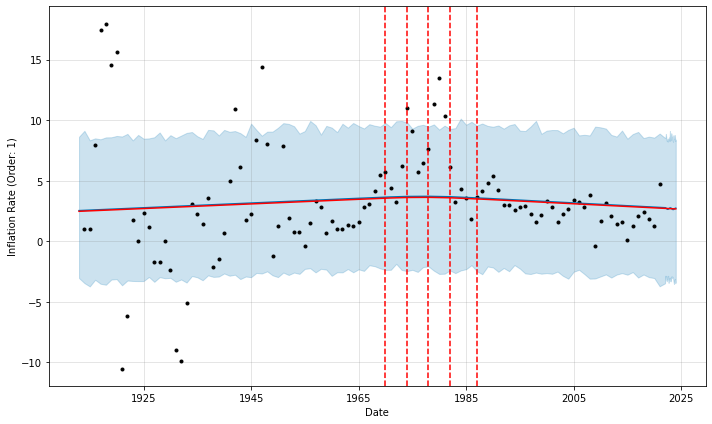

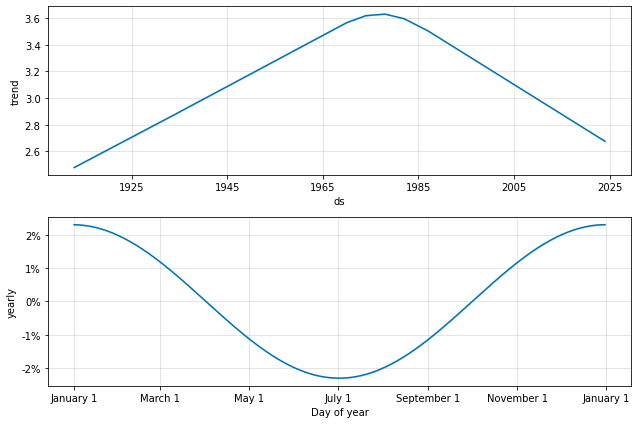

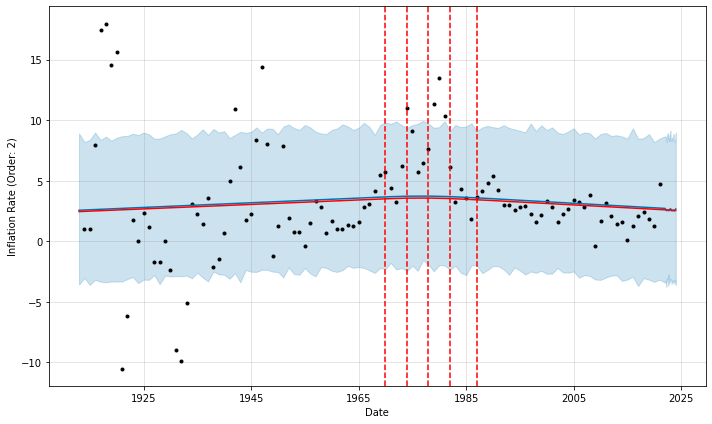

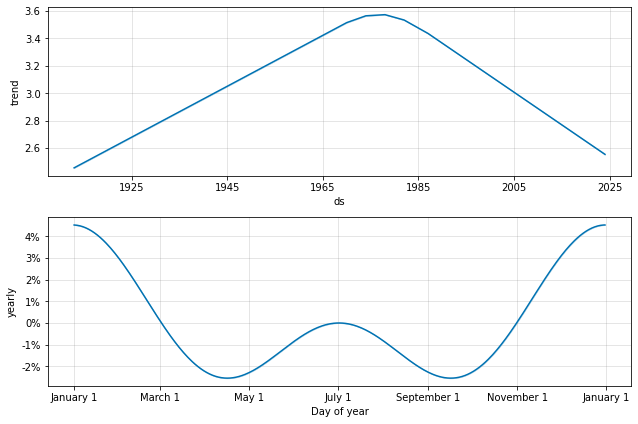

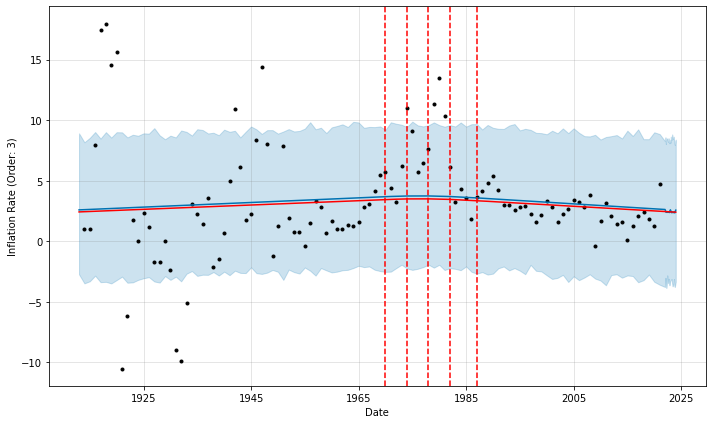

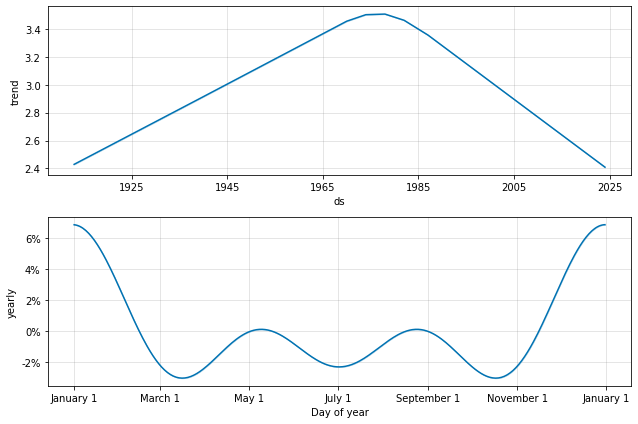

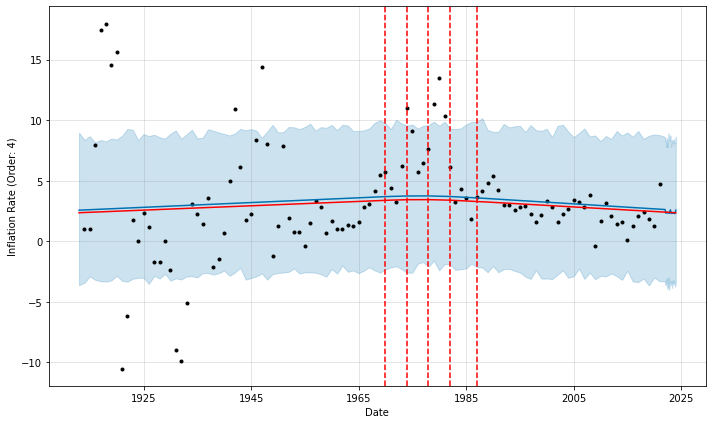

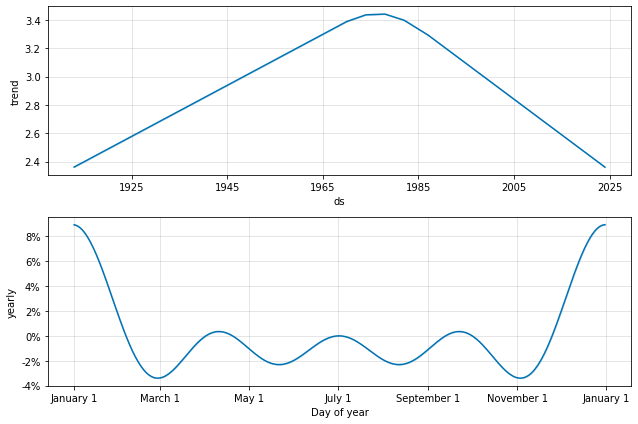

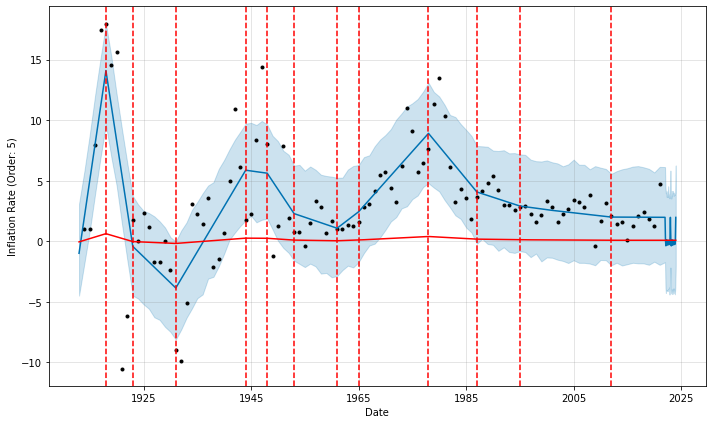

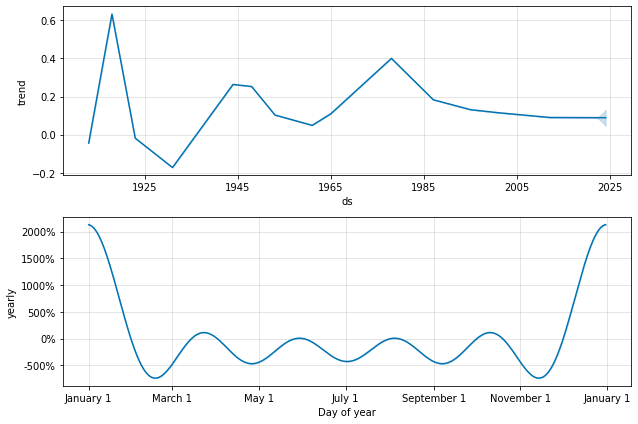

In [ ]:
sdf_model_cpi = df_cpi.copy()
df_model_cpi = df_model_cpi[['Year', 'Inflation']]
df_model_cpi.rename(columns={"Year": "ds", "Inflation": "y"},inplace=True)
df_model_cpi['ds']= pd.to_datetime(df_model_cpi['ds'],format='%Y')

fourier_orders = list(range(0,6,1))

model_dict = {}
display(Markdown('<h2>Model Building in Progress...</h2>'))
counter = 1
for i in fourier_orders:
    if i == 0:
        pass
    else:
        display(Markdown(f'Building {counter}/{len(fourier_orders)-1}'))
        #display(Markdown(f'Order: {i}'))
        temp_model = build_model_prophet(model_data = df_model_cpi,fourier_order = i)
        model = temp_model['model']
        forcast = temp_model['forcast']
        #plot_model(model_data = df_model_cpi,model =  model,forcast = forcast,fourier_order = i)
        #plot_model_components(model = model,forcast = forcast)

        fig = model.plot(forcast, xlabel='Date', ylabel='Inflation Rate (Order: {})'.format(i))
    
        a = add_changepoints_to_plot(fig.gca(), model, forcast)
        fig.show()
        fig = model.plot_components(forcast)
        fig.show()
            
        model_dict[f'Order {i}'] = temp_model
        counter += 1
        
display(Markdown('<h1>Model Building Completed.</h1>'))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c5ceaca9-e365-4132-a867-b543164c96b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>